<a href="https://colab.research.google.com/github/yaminiravala/5731/blob/main/Ravala_yamini_Assignment_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [ ]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade nltk

     |████████████████████████████████| 1.5 MB 787 kB/s eta 0:00:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from collections import Counter
from typing import List, Dict, Tuple
import re
import nltk
from nltk.util import ngrams
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
from itertools import chain
import sys
sys.setrecursionlimit(10000)

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

#load the dataset
df = pd.read_csv('srmtd_reviews_cleaned.csv')
# Extract the Cleaned_Review colunm
dataset = df['Cleaned_Review'].tolist()

#preprocessing the data
def preprocess(text: str) -> List[str]:
    return [word for word in re.findall(r'\b\w+\b', text.lower()) if word.isalpha()]

#here iam trying to count the ngrams usin the function
def count_ngrams(data: List[str], n: int) -> Counter:
    ngram_counts = Counter()
    for sentence in data:
        sentence_tokens = preprocess(sentence)
        sentence_ngrams = ngrams(sentence_tokens, n)
        ngram_counts.update(sentence_ngrams)
    return ngram_counts
trigram_counts = count_ngrams(dataset, 3)

# probabilities for all the bigrams
def bigram_prob(data: List[str]) -> Dict[Tuple[str, str], float]:
    bigrams = list(ngrams(chain(*[preprocess(sentence) for sentence in data]), 2))
    unigrams = list(ngrams(chain(*[preprocess(sentence) for sentence in data]), 1))
    bigram_counts = Counter(bigrams)
    unigram_counts = Counter(unigrams)
    probabilities = {bigram: count / unigram_counts[(bigram[0],)] for bigram, count in bigram_counts.items()}
    return probabilities

# now here we will extract all the noun phrases and calculate the relative probabilities
def extract_noun_phrases(data: List[str]) -> Dict[str, List[float]]:
    stop_words = set(stopwords.words('english'))
    noun_phrases = []
    for sentence in data:
        tokens = word_tokenize(sentence)
        tagged_tokens = pos_tag(tokens)
        phrase = []
        for word, tag in tagged_tokens:
            if tag in ('NN', 'NNS') and word not in stop_words:
                phrase.append(word)
            else:
                if phrase:
                    noun_phrases.append(' '.join(phrase))
                    phrase = []
        if phrase:
            noun_phrases.append(' '.join(phrase))
    phrase_counts = Counter(noun_phrases)
    max_frequency = max(phrase_counts.values())
    relative_probabilities = {phrase: count / max_frequency for phrase, count in phrase_counts.items()}
    return relative_probabilities

#i am now trying to perform the analysis on the data
bigram_probs = bigram_prob(dataset)
noun_phrase_probs = extract_noun_phrases(dataset)


#Output printing...
print("Trigram Counts:")
print(trigram_counts)
print("\nBigram Probabilities:")
print(bigram_probs)
print("\nNoun Phrase Probabilities:")
print(noun_phrase_probs)


Trigram Counts:
Counter({('babu', 'steal', 'show'): 3, ('director', 'koratala', 'siva'): 3, ('director', 'made', 'sure'): 3, ('jagapathi', 'babu', 'harsha'): 3, ('giving', 'back', 'society'): 3, ('movie', 'mahesh', 'babu'): 3, ('used', 'mahesh', 'babu'): 3, ('marriage', 'class', 'flight'): 3, ('class', 'flight', 'interval'): 3, ('flight', 'interval', 'fight'): 3, ('interval', 'fight', 'mango'): 3, ('fight', 'mango', 'farm'): 3, ('mango', 'farm', 'fight'): 3, ('ravikanth', 'jagapathi', 'babu'): 3, ('mahesh', 'babu', 'movie'): 2, ('done', 'excellent', 'job'): 2, ('credit', 'go', 'hero'): 2, ('jagapati', 'babu', 'well'): 2, ('usual', 'comedy', 'track'): 2, ('comedy', 'track', 'big'): 2, ('mahesh', 'babu', 'fan'): 2, ('mahesh', 'babu', 'steal'): 2, ('babu', 'rajendra', 'prasad'): 2, ('career', 'best', 'performance'): 2, ('villain', 'sampath', 'raj'): 2, ('film', 'mahesh', 'babu'): 2, ('harsha', 'vardhan', 'mahesh'): 2, ('vardhan', 'mahesh', 'babu'): 2, ('mahesh', 'babu', 'son'): 2, ('babu'

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/saicharanreddypotluri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/saicharanreddypotluri/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saicharanreddypotluri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [ ]:
# Write your code here
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#dataset loading
data = pd.read_csv('srmtd_reviews_cleaned.csv')
#defining the function to build TF-IDF matrix
def build_tfidf_matrix(documents):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(documents)
    return vectorizer, tfidf_matrix

#To rank documents by cosine similarity i am definung a simple function
def rank_documents(query, vectorizer, tfidf_matrix):
    query_vector = vectorizer.transform([query])
    cosine_similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()
    rankings = cosine_similarities.argsort()[::-1]
    return rankings, cosine_similarities

#This is a random query i gave to check the performance
query = "An outstanding movie with a haunting performance and best character development"

##TF-IDF matrix
vectorizer, tfidf_matrix = build_tfidf_matrix(data['Cleaned_Review'])

rankings, similarities = rank_documents(query, vectorizer, tfidf_matrix)

#Here iam displaying the top 5 ranked documents from the datset
print("Top 5 ranked documents with respect to the query:")
for rank in rankings[:5]:
    print(f"Document Index: {rank}, Similarity Score: {similarities[rank]}")
    print(data['Cleaned_Review'][rank])
    print("\n---\n")


Top 5 ranked documents with respect to the query:
Document Index: 2, Similarity Score: 0.14773951559196927
director koratala siva come unique subject present truly wrote screenplay make sit around hour without complaining single scene said interview every scene connected another never feel particular scene wasted mahesh babu outstanding usual nobody well kind script come mahesh stylish usual looking glamorous definitely going surprise fan others stunning performance best far shruti hassan key role film lead lady also form limb power packed screenplay jagapathi babu rajendra prasad along huge star cast play every character perfectly one imagine someone else playing character screen even single character got wasted even single frame went useless devisriprasad come energetic performance said many background score song usual rocking madhie man talk one presented vision director siva extraordinary way editing choreography department flawlesssimply mahesh another film nobody srimanthudu turn

# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

/Users/saicharanreddypotluri/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/saicharanreddypotluri/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


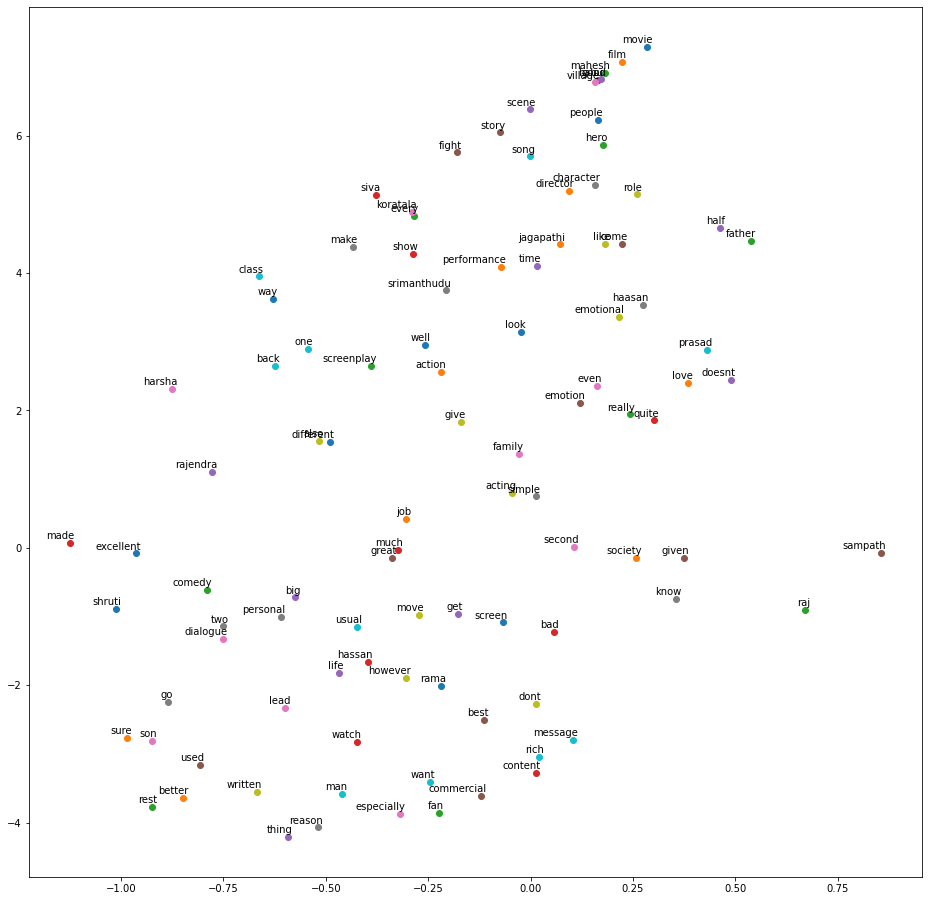

In [ ]:
# Write your code here
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

#HERE I AM TOKENIZING THE CLEANED REVIEWS FOR WORD2VEC MODEL
tokenized_reviews = [review.split() for review in data['Cleaned_Review']]

#(1)Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).
w2v = Word2Vec(sentences=tokenized_reviews, vector_size=300, window=5, min_count=1, workers=4)

#Training a model.
w2v.train(tokenized_reviews, total_examples=w2v.corpus_count, epochs=10)

# (2) Visualize the word embedding model you created.(here i'm using t-SNE)
def tsne_reduce(model, num_words=100):
    labels = []
    tokens = []

    # get the list of words
    for word in model.wv.index_to_key[:num_words]:
        tokens.append(model.wv[word])
        labels.append(word)

    #using t-SNE reduce dimensuions to 2d
    tsne_m = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_m.fit_transform(tokens)
    return new_values, labels
tsne_values, tsne_labels = tsne_reduce(w2v, num_words=100)

#Plot for visulaization of words
plt.figure(figsize=(16, 16))

for i, label in enumerate(tsne_labels):
    x, y = tsne_values[i, 0], tsne_values[i, 1]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')

plt.show()


# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file
# https://github.com/yaminiravala575/5731/blob/main/srmtd_reviews_cleaned.xl.xls 



# Link:



